In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

matplotlib.rc('savefig', dpi=100, format='svg')
# matplotlib.rc('figure', figsize=(9, 8))
# matplotlib.rcParams['figure.figsize'] = (9, 8)

%matplotlib inline

In [2]:
colors = ['orange', 'yellow', 'y', 'lime', 'deepskyblue', 'deeppink']

## Apply Interpolation using various methods 
- Polynomial Function
- Linear, Cubic Spline Interpolation
- Decision Tree and Neural Network

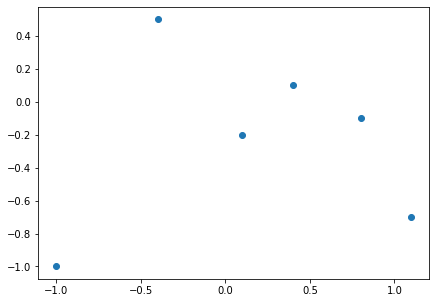

In [3]:
x = np.array([-1, -0.4, 0.1, 0.4, 0.8, 1.1])
y = np.array([-1, 0.5, -0.2, 0.1, -0.1, -0.7])

plt.figure(figsize=(7, 5))
plt.scatter(x, y)

## Try polynomial fit

In [4]:
### this is for drawing the interpolated curve
xs = np.linspace(x.min(), x.max(), 200)

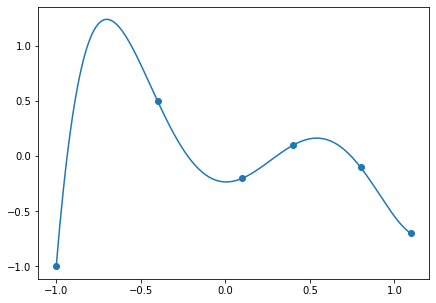

In [5]:
##### https://iq.opengenus.org/polynomial-regression-using-scikit-learn/
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

### generating polynomial features and doing linear regression over it
poly_feat=PolynomialFeatures(degree=len(x)-1)
X_poly=poly_feat.fit_transform(x.reshape(-1, 1))
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)

yout_poly = lin_reg.predict(poly_feat.transform(xs.reshape(-1, 1)))

plt.figure(figsize=(7, 5))
plt.scatter(x, y)
plt.plot(xs, yout_poly)

### Try spline fit

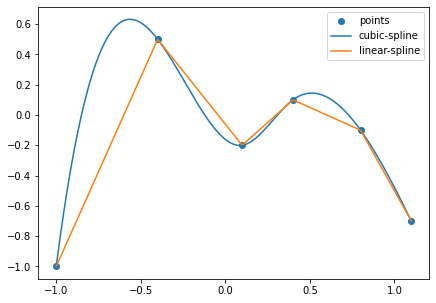

In [6]:
### https://www.geeksforgeeks.org/cubic-spline-interpolation/

from scipy.interpolate import CubicSpline, interp1d

cubic_spline = interp1d(x,y, kind="cubic")
linear_spline = interp1d(x,y, kind="linear")
  
plt.figure(figsize=(7, 5))

yout_cubs = cubic_spline(xs)
plt.scatter(x, y, label="points")
plt.plot(xs, yout_cubs, label='cubic-spline')

yout_lins = linear_spline(xs)
plt.plot(xs, yout_lins, label='linear-spline')
plt.legend()
plt.show()

### Try Decision Tree and Neural Network

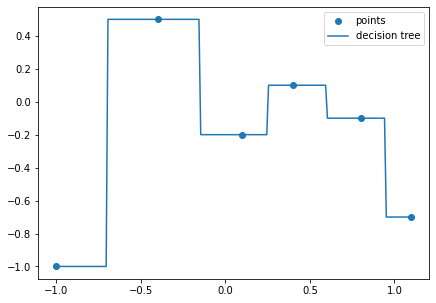

In [7]:
from sklearn.tree import DecisionTreeRegressor
## https://scikit-learn.org/stable/modules/tree.html

dt = DecisionTreeRegressor(random_state=0, max_depth=5)
dt.fit(x.reshape(-1, 1), y)

yout_dt = dt.predict(xs.reshape(-1,1))

plt.figure(figsize=(7, 5))
plt.scatter(x, y, label="points")
plt.plot(xs, yout_dt, label='decision tree')
plt.legend()
plt.show()

## Import my neural network library (made from scratch in numpy)
####  https://github.com/tsumansapkota/mylibrary

In [8]:
import mylibrary.nnlib as tnn

In [9]:
np.random.seed(13)
optim = tnn.SGD(learning_rate=0.01)

linear1 = tnn.LinearLayer(1, 6, optimizer=optim)
acivation = tnn.Relu()
linear2 = tnn.LinearLayer(6, 1, optimizer=optim)

Step: 0 -> Error: 0.42590298096421964
Step: 500 -> Error: 0.12010416522008882
Step: 1000 -> Error: 0.10462651739843747
Step: 1500 -> Error: 0.0979033857475281
Step: 2000 -> Error: 0.08595481566836748
Step: 2500 -> Error: 0.07222048856548337
Step: 3000 -> Error: 0.05656658378429824
Step: 3500 -> Error: 0.04168617033750538
Step: 4000 -> Error: 0.03045806509069317
Step: 4500 -> Error: 0.02285122050172075
Step: 5000 -> Error: 0.01841747793861832
Step: 5500 -> Error: 0.01590035390918816
Step: 6000 -> Error: 0.01391106521937247
Step: 6500 -> Error: 0.012234287407376363
Step: 7000 -> Error: 0.010822276894560457
Step: 7500 -> Error: 0.00964858732283963
Step: 8000 -> Error: 0.008677064766609883
Step: 8500 -> Error: 0.007866288327254828
Step: 9000 -> Error: 0.007177426179340474
Step: 9500 -> Error: 0.006582345041217318
Step: 10000 -> Error: 0.006054292017321419
Step: 10500 -> Error: 0.005579470278014419
Step: 11000 -> Error: 0.005144917092412175
Step: 11500 -> Error: 0.004745603167117438
Step: 1

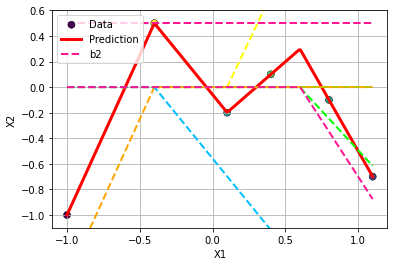

In [10]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(111)
jump = 500

for step in range(60000):
    z1 = linear1.forward(x.reshape(-1, 1))
    a1 = acivation.forward(z1)
    yout = linear2.forward(a1)
    
    dy = yout-y.reshape(-1, 1)
    da1 = linear2.backward(dy)
    dz1 = acivation.backward(da1)
    dx = linear1.backward(dz1)
    
    linear1.update()
    linear2.update()
    
    if step%jump == 0:
        err = 0.5*(dy**2).mean()
        
        print(f"Step: {step} -> Error: {err}")
        
        
        z1 = linear1.forward(xs.reshape(-1, 1))
        a1 = acivation.forward(z1)
        yout_nn = linear2.forward(a1)
        
        ax.clear()
        ax.scatter(x, y, c=y, s=50, edgecolors='k', lw=0.5, label="Data")
        ax.plot(xs, yout_nn.reshape(-1), lw=3, color="r", label="Prediction")
        for i in range(linear2.weights.shape[0]):
            yi = a1[:,i]*linear2.weights[i]# + linear2.bias/linear2.weights.shape[0]
            ax.plot(xs, yi, lw=2, color=colors[i], linestyle='dashed')
        ax.plot(x, np.zeros_like(x)+linear2.bias, lw=2, color=colors[-1], linestyle='dashed', label=f'b2')
        
        ax.legend()
        ax.set_xlabel("X1")
        ax.set_ylabel('X2')
        ax.set_xlim((x.min()-0.1, x.max()+0.1))
        ax.set_ylim((y.min()-0.1, y.max()+0.1))
        ax.grid()

        fig.canvas.draw()
        plt.pause(0.01)

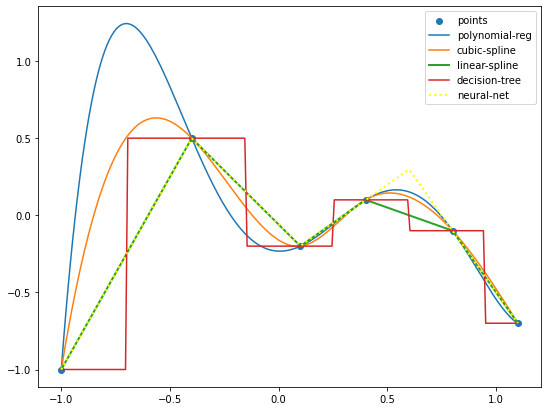

In [11]:
## Plot all the outputs here
%matplotlib inline
plt.figure(figsize=(9, 7))

plt.scatter(x, y, label="points")
plt.plot(xs, yout_poly, label="polynomial-reg")
plt.plot(xs, yout_cubs, label='cubic-spline')
plt.plot(xs, yout_lins, lw=2, label='linear-spline')
plt.plot(xs, yout_dt, label='decision-tree')
plt.plot(xs, yout_nn.reshape(-1), lw=2, linestyle="dotted", color="yellow", label="neural-net")
plt.legend()
plt.savefig("./00_different_fits.svg")
plt.show()

# Piecewise Functions

#### Animate parameters change in relu neuron -1D

In [12]:
from matplotlib import animation

matplotlib.rc('animation', html='jshtml')

In [13]:
%matplotlib inline

fig = plt.figure(figsize=(8,4))
ax0 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)
plt.close()

x = np.linspace(-4,4,300)

w1s = np.concatenate([np.linspace(1, -2, 10), np.linspace(-2, 3, 10), np.linspace(3, 1, 10)])
b1s = np.concatenate([np.linspace(0, -2, 10), np.linspace(-2, 2, 15), np.linspace(2, 0, 5)])
w2s = np.concatenate([np.linspace(1, -1, 10), np.linspace(-1, 1.5, 15), np.linspace(1.5, 1, 5)])
b2s = np.concatenate([np.linspace(0, 1.5, 5), np.linspace(2, -1.5, 15), np.linspace(-1.5, 0, 10)])

actf = tnn.Relu().forward

def animate(i):
    if i%10 == 0:
        print(f'Step {i} / {len(w1s)}')
        
    ax0.clear()    
    ax1.clear()    
    ax2.clear()    
    ax3.clear()    
        
    s0 = actf(x*w1s[i])
    ax0.axhline(0,color='k')
    ax0.axvline(0,color='k')
    ax0.grid()
    ax0.plot(x, s0, lw=2, color=colors[0])
    ax0.set_ylim((-2.5, 2.5))
    ax0.text(-4, -0.9, f"w1: {w1s[i]:.2f}")

    ax0.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=True,          # ticks along the top edge are on
    labelbottom=False, # labels along the bottom edge are off
    labeltop=True)     # label on top edge are on

    
    s1 = actf(x+b1s[i])
    ax1.axhline(0,color='k')
    ax1.axvline(0,color='k')
    ax1.grid()
    ax1.plot(x, s1, lw=2, color=colors[1])
    ax1.set_ylim((-2.5, 2.5))
    ax1.text(-4, -0.9, f"b1: {b1s[i]:.2f}")
    
    ax1.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=True,          
    labelbottom=False, 
    labeltop=True)
    ax1.tick_params(
    axis='y',          
    which='both',      
    left=False,      
    right=True,          
    labelleft=False, 
    labelright=True)
    
    s2 = actf(x)*w2s[i]
    ax2.axhline(0,color='k')
    ax2.axvline(0,color='k')
    ax2.grid()
    ax2.plot(x, s2, lw=2, color=colors[2])
    ax2.set_ylim((-2.5, 2.5))
    ax2.text(-4, 0.75, f"w2: {w2s[i]:.2f}")
    
    s3 = actf(x)+b2s[i]
    ax3.axhline(0,color='k')
    ax3.axvline(0,color='k')
    ax3.grid()
    ax3.plot(x, s3, lw=2, color=colors[3])
    ax3.set_ylim((-2.5, 2.5))
    ax3.text(-4, 0.75, f"b2: {b2s[i]:.2f}")
    
    ax3.tick_params(
    axis='y',          
    which='both',      
    left=False,      
    right=True,          
    labelleft=False, 
    labelright=True)



anim = animation.FuncAnimation(fig, animate,frames=len(w1s),
                               init_func=lambda:None, interval=100)

In [14]:
anim

Step 0 / 30
Step 10 / 30
Step 20 / 30


In [ ]:
# writer_gif = animation.ImageMagickWriter(fps=10)
# anim.save('01_relu-variations-shape.gif', writer=writer_gif, dpi=100)

### Step 1: Create a synthetic non-linear dataset

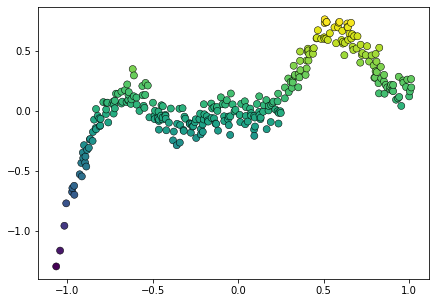

In [15]:
np.random.seed(1321)
x = np.linspace(0,1,300)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
x = np.sort(x)

y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise

x, y = x*2, y*0.75
x = x - x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)

%matplotlib inline
plt.figure(figsize=(7, 5))
plt.scatter(x, y, c=yy, s=50, edgecolors='k', lw=0.5, label="Data")
plt.savefig("./02_regression_dataset.svg")
plt.show()

In [16]:
xs = np.linspace(x.min(), x.max(), 300)

### Piecewise MLP using relu activation

In [17]:
np.random.seed(1)
optim = tnn.SGD(learning_rate=0.03)

linear1 = tnn.LinearLayer(1, 6, optimizer=optim)
# linear1.weights *= 2
acivation = tnn.Relu()
linear2 = tnn.LinearLayer(6, 1, optimizer=optim)

Step: 0 -> Error: 2.105725689235404
Step: 500 -> Error: 0.02767452176939148
Step: 1000 -> Error: 0.02596397033483958
Step: 1500 -> Error: 0.02554470662331021
Step: 2000 -> Error: 0.025410167352155604
Step: 2500 -> Error: 0.025326120361892707
Step: 3000 -> Error: 0.025239768556675736
Step: 3500 -> Error: 0.025109446400604814
Step: 4000 -> Error: 0.024875856428156432
Step: 4500 -> Error: 0.02450876170264481
Step: 5000 -> Error: 0.024160471421998134
Step: 5500 -> Error: 0.023901379095089628
Step: 6000 -> Error: 0.02366497168205875
Step: 6500 -> Error: 0.02341555343881191
Step: 7000 -> Error: 0.023151231353802114
Step: 7500 -> Error: 0.022873331399793796
Step: 8000 -> Error: 0.022581418782946668
Step: 8500 -> Error: 0.022276352292921804
Step: 9000 -> Error: 0.02195972712806426
Step: 9500 -> Error: 0.021633039302488128
Step: 10000 -> Error: 0.021298968013536774
Step: 10500 -> Error: 0.020960647417342687
Step: 11000 -> Error: 0.020616885478583848
Step: 11500 -> Error: 0.020268110429078594
St

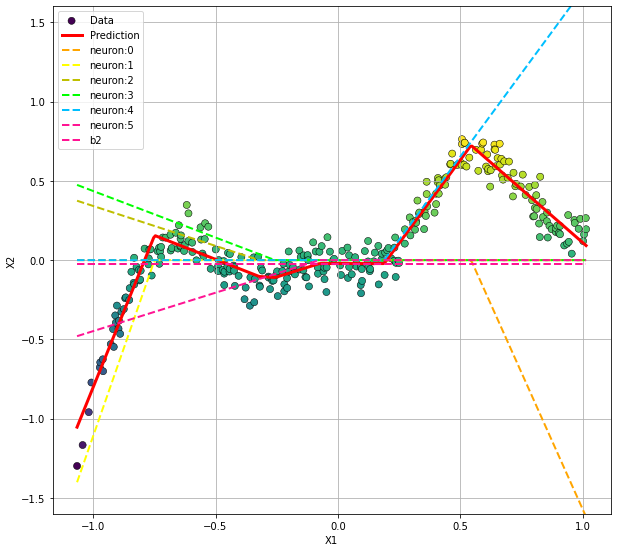

In [18]:
%matplotlib tk
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
jump = 500

for step in range(40000):
    z1 = linear1.forward(xx)
    a1 = acivation.forward(z1)
    yout = linear2.forward(a1)
    
    dy = yout-yy
    da1 = linear2.backward(dy)
    dz1 = acivation.backward(da1)
    dx = linear1.backward(dz1)
    
    linear1.update()
    linear2.update()
    
    if step%jump == 0:
        err = 0.5*(dy**2).mean()
        
        print(f"Step: {step} -> Error: {err}")
        
        ax.clear()
        ax.scatter(x, y, c=y, s=50, edgecolors='k', lw=0.5, label="Data")
        
        z1 = linear1.forward(xs.reshape(-1,1))
        a1 = acivation.forward(z1)
        yout = linear2.forward(a1)
        ax.plot(xs, yout.reshape(-1), lw=3, color="r", label="Prediction")
        for i in range(linear2.weights.shape[0]):
            yi = a1[:,i]*linear2.weights[i]# + linear2.bias/linear2.weights.shape[0]
            ax.plot(xs, yi, lw=2, color=colors[i], linestyle='dashed', label=f'neuron:{i}')
        ax.plot(xs, np.zeros_like(x)+linear2.bias, lw=2, color=colors[-1], linestyle='dashed', label=f'b2')
        
        ax.legend()
        ax.set_xlabel("X1")
        ax.set_ylabel('X2')
#         ax.set_xlim((x.min()-0.1, x.max()+0.1))
#         ax.set_ylim((y.min()-0.1, y.max()+0.1))
        ax.set_xlim((x.min()-0.1, x.max()+0.1))
        ax.set_ylim((-1.6, 1.6))
        ax.grid()

        fig.canvas.draw()
        plt.pause(0.01)

In [19]:
err

0.0035527345557546147

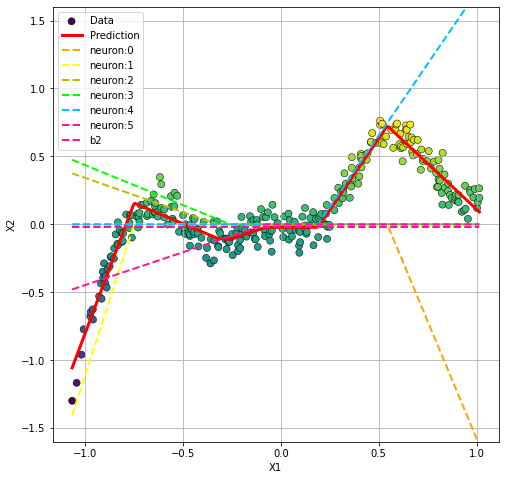

In [21]:
%matplotlib inline
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

ax.scatter(x, y, c=y, s=50, edgecolors='k', lw=0.5, label="Data")
z1 = linear1.forward(xs.reshape(-1,1))
a1 = acivation.forward(z1)
yout = linear2.forward(a1)
ax.plot(xs, yout.reshape(-1), lw=3, color="r", label="Prediction")
for i in range(linear2.weights.shape[0]):
    yi = a1[:,i]*linear2.weights[i]# + linear2.bias/linear2.weights.shape[0]
    ax.plot(xs, yi, lw=2, color=colors[i], linestyle='dashed', label=f'neuron:{i}')
ax.plot(xs, np.zeros_like(x)+linear2.bias, lw=2, color=colors[-1], linestyle='dashed', label=f'b2')

ax.legend()
ax.set_xlabel("X1")
ax.set_ylabel('X2')
ax.set_xlim((x.min()-0.1, x.max()+0.1))
ax.set_ylim((-1.6, 1.6))
ax.grid()

plt.savefig("./03_MLP_piecewise.svg")
plt.show()

In [22]:
yout_nn = yout.copy()

## PWLF

In [23]:
import pwlf
PWLF = pwlf.PiecewiseLinFit(x, y)

In [24]:
pieces = 5
breaks_x = PWLF.fit(pieces)
yout = PWLF.predict(xs)

breaks_y = PWLF.predict(breaks_x)
print(breaks_x, breaks_y)

[-1.06568202 -0.75075601 -0.35579836  0.22498775  0.53312702  1.01408222] [-1.09369751  0.17747187 -0.10559594  0.01400291  0.73932938  0.08901046]


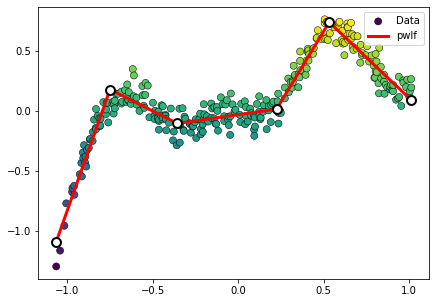

In [25]:
%matplotlib inline
plt.figure(figsize=(7, 5))
plt.scatter(x, y, c=yy, s=50, edgecolors='k', lw=0.5, label="Data")
plt.plot(xs, yout, lw=3, color="r", label="pwlf")
plt.scatter(breaks_x, breaks_y, s=80, edgecolors="k", lw=2, c='w', zorder=10)

plt.legend()
plt.savefig("./04_pieceise_linear_fit.svg")
plt.show()

In [26]:
error = 0.5*((PWLF.predict(x)-y)**2).mean()
error

0.0035412245640530694

### Comparision

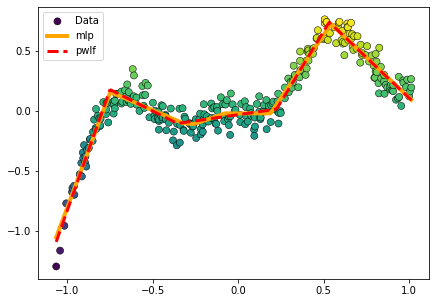

Errors -> MLP:0.0035527345557546147 PWLF:0.0035412245640530694


In [27]:
## plot at the same time
plt.figure(figsize=(7, 5))
plt.scatter(x, y, c=yy, s=50, edgecolors='k', lw=0.5, label="Data")
plt.plot(xs, yout_nn, lw=4, color="orange", label="mlp")
plt.plot(xs, yout, lw=3, color="r", label="pwlf", linestyle="dashed")

plt.legend()
plt.show()
print(f"Errors -> MLP:{err} PWLF:{error}")

## Conversion: PWLF to ReLU MLP

In [28]:
slopes = PWLF.calc_slopes()
slopes

array([ 4.03640636, -0.71670423,  0.2059258 ,  2.35389173, -1.35214033])

In [29]:
breaks_x, breaks_y

(array([-1.06568202, -0.75075601, -0.35579836,  0.22498775,  0.53312702,
         1.01408222]),
 array([-1.09369751,  0.17747187, -0.10559594,  0.01400291,  0.73932938,
         0.08901046]))

In [30]:
# linearly dependent neural network to be designed
W2 = [slopes[0], ]
for i in range(1, len(slopes)):
    wi = slopes[i] - slopes[i-1]
    W2.append(wi)
# W2 = slopes
    
W2 = np.array(W2)#.reshape(-1, 1)
print(f"dependent slopes :{W2}")

dependent slopes :[ 4.03640636 -4.75311058  0.92263002  2.14796593 -3.70603206]


In [31]:
slopes

array([ 4.03640636, -0.71670423,  0.2059258 ,  2.35389173, -1.35214033])

In [32]:
W1 = np.ones([1, len(slopes)])
W1

array([[1., 1., 1., 1., 1.]])

In [33]:
## bias are actually break points for x in the domain of y
### y = mx + c ( b is value of c where y = 0)
### i.e c = -mx (where c is the break points in the x, we have m = 1's )
b1 = -breaks_x[:-1]  ## last break point can be ignored.

### since function starts with first break points, its final y value = break_y[0]
b2 = breaks_y[0]

In [34]:
b1

array([ 1.06568202,  0.75075601,  0.35579836, -0.22498775, -0.53312702])

In [35]:
b2

-1.093697510721195

In [36]:
### Now the mlp can be created as:
### forward propagation
z1 = np.matmul(xs.reshape(-1, 1), W1) + b1
a1 = np.maximum(0, z1)
z2 = np.matmul(a1, W2) + b2

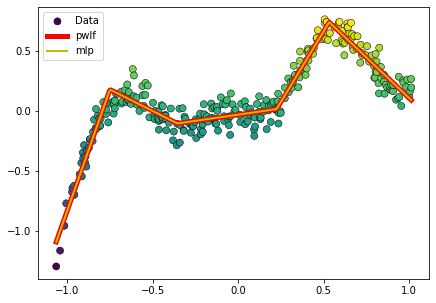

In [37]:
plt.figure(figsize=(7, 5))

plt.scatter(x, y, c=yy, s=50, edgecolors='k', lw=0.5, label="Data")
plt.plot(xs, yout, lw=5, color="r", label="pwlf")
plt.plot(xs, z2, lw=2, color="y", label="mlp")
plt.legend()
plt.show()

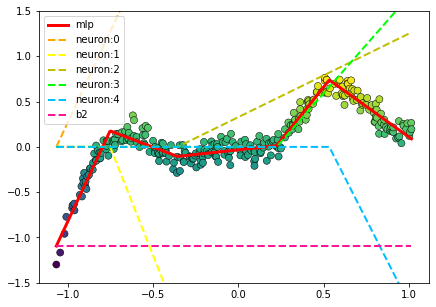

In [38]:
%matplotlib inline
plt.figure(figsize=(7, 5))
plt.ylim(-1.5,1.5)

plt.scatter(x, y, c=yy, s=50, edgecolors='k', lw=0.5)
plt.plot(xs, z2, lw=3, color="r", label="mlp")

for i, (a1i, w2i) in enumerate(zip(a1.T, W2)):
    plt.plot(xs, a1i*w2i, lw=2, color=colors[i], linestyle='dashed', label=f'neuron:{i}')
plt.plot(xs, np.zeros_like(xs)+b2, lw=2, color=colors[-1], linestyle='dashed', label=f'b2')
plt.legend()
plt.show()

### Convert to Decision Tree

In [39]:
# constructing decision tree equivalent to above piecewise network
class Question:

    def __init__(self, value):
        self.value = value

    def match(self, data):
        val = data
        return val <= self.value

    def __repr__(self):
        return "Is X <= %s?" % (str(self.value))

class Leaf:
    def __init__(self, m, c, data=None):
        self.slope = m
        self.intercept = c

    def __repr__(self):
        return f"m:{self.slope} c:{self.intercept}"

class Decision_Node:
    def __init__(self,
                 question,
                 true_branch,
                 false_branch):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch

In [40]:
#### copied from the internet somewhere
def print_tree(node, spacing="    "):
    """World's most elegant tree printing function."""

    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        print (spacing +'====='+ f"m={node.slope}  ,c={node.intercept}")
        return

    # Print the question at this node
    print (spacing + str(node.question))

    # Call this function recursively on the true branch
    print (spacing + '--> True:')
    print_tree(node.true_branch, spacing + "   ")

    # Call this function recursively on the false branch
    print (spacing + '--> False:')
    print_tree(node.false_branch, spacing + "   ")

In [41]:
def make_tree_from_pwlf(break_pts, indices):
    if len(break_pts) == 1:
        indx = indices[0]
        m = slopes[indx]
        c = intercepts[indx]
        return Leaf(m, c)

    mid = len(break_pts)//2 # mid point of break point
    question = Question(break_pts[mid]) # make mid point a question
    points_left = break_pts[:mid] # left points
    points_right = break_pts[mid:] # right points 
    index_left = indices[:mid] # indices of left points
    index_right = indices[mid:] # indices of right points
    
    yes_answer = make_tree_from_pwlf(points_left, index_left) # yes answer for the left points
    no_answer = make_tree_from_pwlf(points_right, index_right) # no answer for the right points
    return Decision_Node(question, yes_answer, no_answer) # construct recursive tree structure

In [42]:
slopes = PWLF.calc_slopes()
intercepts = PWLF.intercepts

    Is X <= -0.3557983646944069?
    --> True:
       Is X <= -0.7507560061668124?
       --> True:
          =====m=4.03640635736074  ,c=3.2078281880672526
       --> False:
          =====m=-0.7167042261091205  ,c=-0.360598130447787
    --> False:
       Is X <= 0.2249877523183771?
       --> True:
          =====m=0.2059257979473884  ,c=-0.03232787667051977
       --> False:
          Is X <= 0.5331270201759021?
          --> True:
             =====m=2.35389172806502  ,c=-0.5155939033441379
          --> False:
             =====m=-1.3521403313076434  ,c=1.460191925145572


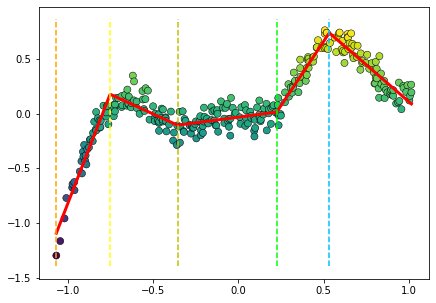

In [43]:
index_points = np.arange(0, len(W2)) ## number of nodes
eqv_tree = make_tree_from_pwlf(breaks_x[:-1], index_points)
print_tree(eqv_tree)

##### plotting the decision boundary in the data
plt.figure(figsize=(7, 5))
plt.scatter(x, y, c=yy, s=50, edgecolors='k', lw=0.5)
plt.plot(xs, z2, lw=3, color="r", label="mlp")
for i, bx in enumerate(breaks_x[:-1]):
    plt.vlines(bx, y.min()-0.1, y.max()+0.1, color=colors[i], linestyle='dashed')

# 2-D piecewise functions

### Bilinear / Bicubic Interpolation

In [44]:
#### https://blog.finxter.com/scipy-interpolate-1d-2d-and-3d/

x = np.linspace(0, 4, 20)
y = np.linspace(0, 4, 20)
X, Y = np.meshgrid(x, y)

Z = np.arccos(-np.cos(2*X) * np.cos(2*Y))

In [45]:
X.shape, Y.shape, Z.shape

((20, 20), (20, 20), (20, 20))

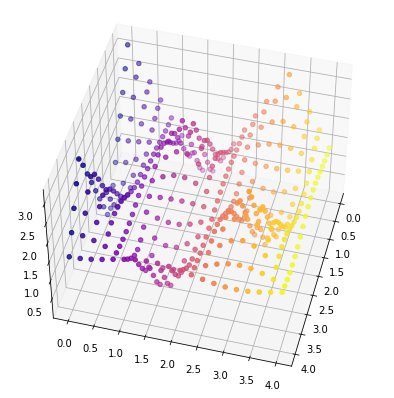

In [50]:
%matplotlib tk

fig = plt.figure(figsize=(9, 7))
ax = plt.axes(projection='3d')

ax.scatter(X, Y, Z, marker="o", c=Y, cmap='plasma')
plt.show()
plt.pause(10)

In [51]:
#denser grid of points that we want to interpolate
x2 = np.linspace(0, 4, 80)
y2 = np.linspace(0, 4, 80)
X2, Y2 = np.meshgrid(x2, y2)

In [52]:
from scipy.interpolate import interp2d

In [53]:
f = interp2d(X, Y, Z, kind="linear")
# f = interp2d(X, Y, Z, kind="cubic")
Z2 = f(x2, y2)

In [56]:
%matplotlib tk

fig = plt.figure(figsize=(9, 7))
ax = plt.axes(projection='3d')

ax.scatter(X2, Y2, Z2, marker=".", c=Y2, cmap='plasma')
plt.show()
# plt.pause(10)

In [57]:
%matplotlib tk

fig = plt.figure(figsize=(9, 7))
ax = plt.axes(projection='3d')

### matplotlib again uses interpolation to plot continuously
ax.plot_surface(X2, Y2, Z2, cmap='plasma')
plt.show()
plt.pause(1)

### For Decision Tree, check out
- https://youtu.be/9w16p4QmkAI?t=524

## MLP based piecewise function

#### First generating synthetic dataset

In [58]:
num_points = 75
# X1 = np.linspace(-2.5, 1.9, num_points)
X1 = np.linspace(-2.5, 2.5, num_points)
X2 = np.linspace(-2.5, 3, num_points)
# X2 = np.linspace(-2.2, 2.1, num_points)
X1, X2 = np.meshgrid(X1, X2)

Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1. - 0.1*(X1)+0.02*(X2)
# Y = np.sqrt(X1**2 + X2**2)

####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1

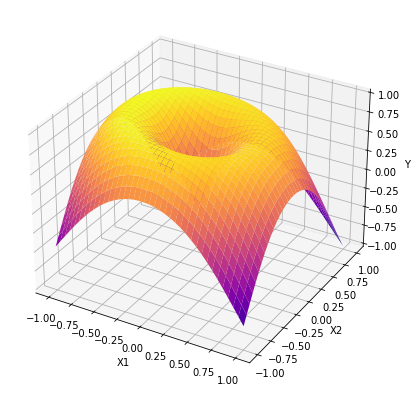

In [61]:
x1 = X1.reshape(-1)
x2 = X2.reshape(-1)
y = Y.reshape(-1)

xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

%matplotlib inline
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [62]:
## Define piecewise MLP
np.random.seed(103)
net = tnn.AutoForm(new_layers=True)
layer1 = tnn.NonLinearLayer(2, 10, activation=tnn.Relu(), optimizer=tnn.Adam())
layer2 = tnn.LinearLayer(10, 1, optimizer=tnn.Adam())

Epoch:0 | Error:0.4338695752848783
Epoch:200 | Error:0.02210244077848733
Epoch:400 | Error:0.013516933596838598
Epoch:600 | Error:0.00786933825340884
Epoch:800 | Error:0.004031119939408052
Epoch:1000 | Error:0.0030922309899876666
Epoch:1200 | Error:0.002784117705173584
Epoch:1400 | Error:0.002702254139506503
Epoch:1600 | Error:0.002667555790520768
Epoch:1800 | Error:0.002651475542006638
Epoch:2000 | Error:0.0026426901752593353
Epoch:2200 | Error:0.002641211602526361
Epoch:2400 | Error:0.0026798683814118
Epoch:2600 | Error:0.0026100271040696487
Epoch:2800 | Error:0.002606637471716192


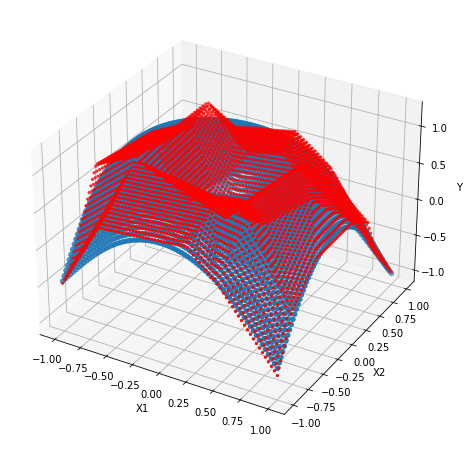

In [63]:
%matplotlib tk
fig = plt.figure(figsize=(9,8))
ax = plt.axes(projection='3d')

for epoch in range(3000):

    yout = net.forward(xx)
    
    dy = yout - yy
    net.backward(dy)
    net.update()

    if epoch%200 == 0:
        error = 0.5*(dy**2).mean()
        print(f'Epoch:{epoch} | Error:{error}')
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        yout_ = yout.reshape(Y.shape)
        ax.scatter(X1, X2, yout_, color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)

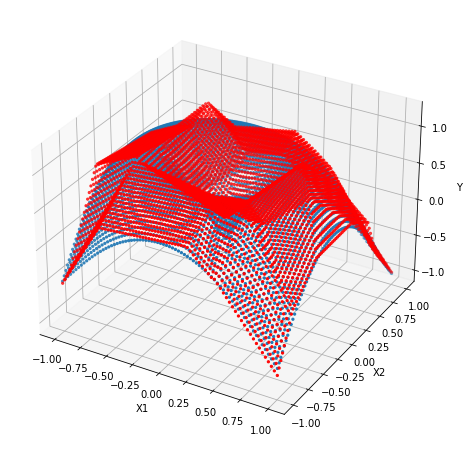

In [64]:
%matplotlib inline
fig = plt.figure(figsize=(9,8))
ax = plt.axes(projection='3d')
ax.scatter(X1, X2, Y, marker= '.')
ax.scatter(X1, X2, yout_, color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [65]:
### Extracting the pieces
###### equation of line where (wx+b) == 0

## (x0w0 + x1w1 + b = 0) ... solving
## x2 = (-b-w1x1)/w2

## lets draw line given x1 is in -2 and 2.
lines = []
for i in range(len(layer1.bias)):
    ## for x1 = -2 and 2
    w1, w2 = layer1.weights[:, i]
    x2_a = -(layer1.bias[i]+w1*-2)/w2
    x2_b = -(layer1.bias[i]+w1*2)/w2
    lines.append([(-2, x2_a), (2, x2_b)])

In [66]:
lines = np.array(lines)

(-1.0, 1.0)

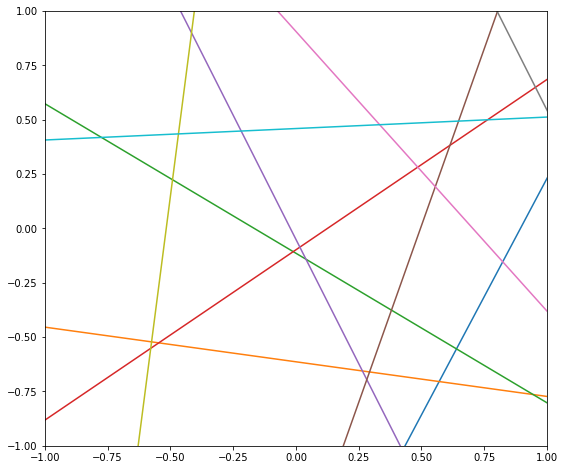

In [67]:
## plot the lines
plt.figure(figsize=(9,8))
for line in lines:
    plt.plot(line[:,0], line[:,1])
plt.xlim(-1, 1)
plt.ylim(-1, 1)

In [68]:
### similar binary decision boundaries are used in Locally Sensitive Hashing !!

In [71]:
%matplotlib tk
fig = plt.figure(figsize=(9,8))
ax = plt.axes(projection='3d')
ax.scatter(X1, X2, Y, marker= '.')
ax.scatter(X1, X2, yout_, color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()
# plt.pause(10)

In [72]:
### Lets plot the dx magnitude to find different pieces

yout = net.forward(xx)
dy = yout - yy
dx = net.backward(dy)
mag = np.linalg.norm(dx, ord=1, axis=1, keepdims=True)
mag = dy.reshape(-1)/dx[:,0]

%matplotlib tk
fig = plt.figure(figsize=(9,8))
ax = plt.axes(projection='3d')
ax.scatter(X1, X2, Y, marker= '.')
ax.scatter(X1, X2, mag.reshape(Y.shape), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()
plt.pause(0.1)

## More details (for multiple layers and more)
- On the number of response regions of deep feedforward networks with piecewise linear activations (https://arxiv.org/abs/1312.6098)